# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rheisan Firnandatama Rizky Satria
- **Email:** rheiikunn@gmail.com
- **ID Dicoding:** rheisanfrs24

## Menentukan Pertanyaan Bisnis

- Pada musim apa rata-rata penyewaan tertinggi terjadi?
- Pada cuaca apa rata-rata penyewaan tertinggi terjadi?
- Apakah weekend mempengaruhi rata-rata penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [126]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada proses data gathering ini menggunakan 1 dataset yaitu day.csv, karena 1 dataset tersebut sudah dapat menjawab pertanyaan bisnis yang diberikan.

### Assessing Data

In [127]:
#Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [128]:
#Memeriksa apakah ada missing value

day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [129]:
#Memeriksa duplikasi pada tabel
print("Jumlah duplikasi dari tabel day: ", day_df.duplicated().sum())

Jumlah duplikasi dari tabel day:  0


In [130]:
#Mememeriksa parameter dari tabel day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Menilai dataset yang akan digunakan, terdapat 1 kolom yang tidak sesuai type datanya yaitu kolom dteday.

### Cleaning Data

Rename

In [131]:
#Mengganti nama kolom
day_df.rename(columns={'instant': 'record_index', 'dteday':'date', 'yr':'year', 'mnth': 'month', 'workingday': 'working_day', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feeling_temperature', 'hum': 'humidity', 'windspeed': 'wind_speed', 'casual': 'casual_users', 'registered': 'registered_users', 'cnt': 'count'}, inplace=True)

In [132]:
day_df.describe()

,record_index,season,year,month,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual_users,registered_users,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Change data type

In [133]:
#Merubah tipe data kolom dteday menjadi date
day_df['date'] = pd.to_datetime(day_df['date'])

#Daftar kolom yang ingin diubah menjadi kategori
change_columns = ['season', 'month', 'weekday', 'weather']

#Mengubah tipe data kolom-kolom menjadi kategori
day_df[change_columns] = day_df[change_columns].astype('category')

Konversi isi dari kolom yang tipe datanya telah diubah

In [134]:
#Melakukan konversi isi kolom season
season_conv = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

day_df['season'] = day_df['season'].map(season_conv)

In [135]:
#Melakukan konversi isi kolom month
month_conv = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
            7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_df['month'] = day_df['month'].map(month_conv)

In [136]:
#Melakukan konversi isi kolom weekday
weekday_conv = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['weekday'] = day_df['weekday'].map(weekday_conv)

In [137]:
#Melakukan konversi isi kolom weather
weather_conv = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}

day_df['weather'] = day_df['weather'].map(weather_conv)

**Insight:**
- Mengubah nama dari kolom agar pengguna lebih mudah dalam membaca data
- Mengubah isi kolom yang awalnya berupa angka (tidak semua paham dengan kode angka tersebut), menjadi sebuah string

## Exploratory Data Analysis (EDA)

### Explore day_df

In [138]:
day_df.describe(include= "all")

,record_index,date,season,year,month,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual_users,registered_users,count
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [139]:
#Menampilkan musim dan jumlah penyewaan sepeda
day_df.groupby('season')['count'].sum().reset_index()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\2006508881.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')['count'].sum().reset_index()


,season,count
0,springer,471348
1,summer,918589
2,fall,1061129
3,winter,841613


In [140]:
#Menampilkan bulan dan jumlah penyewaan sepeda
day_df.groupby('month')['count'].sum().reset_index()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\2089665193.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('month')['count'].sum().reset_index()


,month,count
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


In [141]:
#Menampilkan hari dan jumlah penyewaan sepeda
day_df.groupby('weekday')['count'].sum().reset_index()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\1438840356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday')['count'].sum().reset_index()


,weekday,count
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


In [142]:
#Menampilkan cuaca dan jumlah penyewaan sepeda
day_df.groupby('weather')['count'].sum().reset_index()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\3166139321.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weather')['count'].sum().reset_index()


,weather,count
0,Clear,2257952
1,Mist,996858
2,Light Snow,37869


**Insight:**
- Mendapatkan jumlah penyewaan sepeda berdasarkan musim, hari, bulan, dan cuaca

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa rata-rata penyewaan tertinggi terjadi?


     season        count
0  springer  2604.132597
1    summer  4992.331522
2      fall  5644.303191
3    winter  4728.162921


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\3441900426.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_group = day_df.groupby('season')['count'].mean().reset_index()
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\3441900426.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_group, x='season', y='count', palette=colors)  # Menggunakan list warna


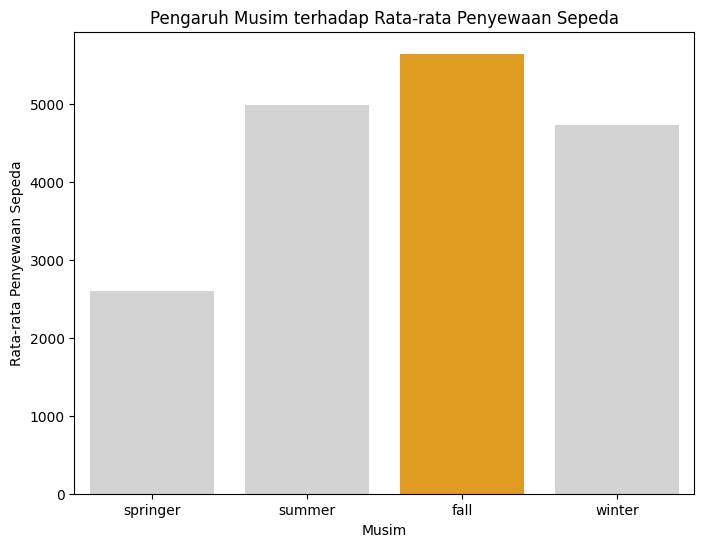

In [143]:
season_group = day_df.groupby('season')['count'].mean().reset_index()
print(season_group)
# Menentukan nilai maksimum dari rata-rata penyewaan
max_value = season_group['count'].max()  # Nilai maksimum

# Mengatur warna untuk setiap batang
colors = ['orange' if x == max_value else 'lightgray' for x in season_group['count']]

# Visualisasi
plt.figure(figsize=(8, 6))
season_order = season_group['season']
sns.barplot(data=season_group, x='season', y='count', palette=colors)  # Menggunakan list warna
plt.title('Pengaruh Musim terhadap Rata-rata Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

### Pertanyaan 2: Pada cuaca apa rata-rata penyewaan tertinggi terjadi?


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\4286406645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_group = day_df.groupby('weather')['count'].mean().reset_index()
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\4286406645.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_group, x='weather', y='count', palette=colors)  # Menggunakan list warna


      weather        count
0       Clear  4876.786177
1        Mist  4035.862348
2  Light Snow  1803.285714


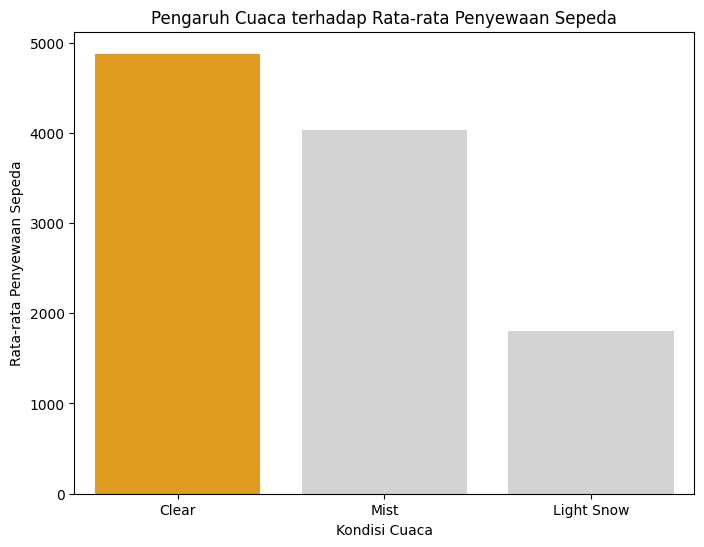

In [144]:
weather_group = day_df.groupby('weather')['count'].mean().reset_index()
print(weather_group)
# Menentukan nilai maksimum dari rata-rata penyewaan
max_value = weather_group['count'].max()  # Nilai maksimum

# Mengatur warna untuk setiap batang
colors = ['orange' if x == max_value else 'lightgray' for x in weather_group['count']]

# Visualisasi
plt.figure(figsize=(8, 6))
weather_order = season_group['season']
sns.barplot(data=weather_group, x='weather', y='count', palette=colors)  # Menggunakan list warna
plt.title('Pengaruh Cuaca terhadap Rata-rata Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

- Apakah weekend mempengaruhi rata-rata penyewaan sepeda?

  is_weekend        count
0    Weekday  4550.566219
1    Weekend  4389.685714


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\4276025978.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rentals, x='is_weekend', y='count', palette=['orange', 'lightgray'])


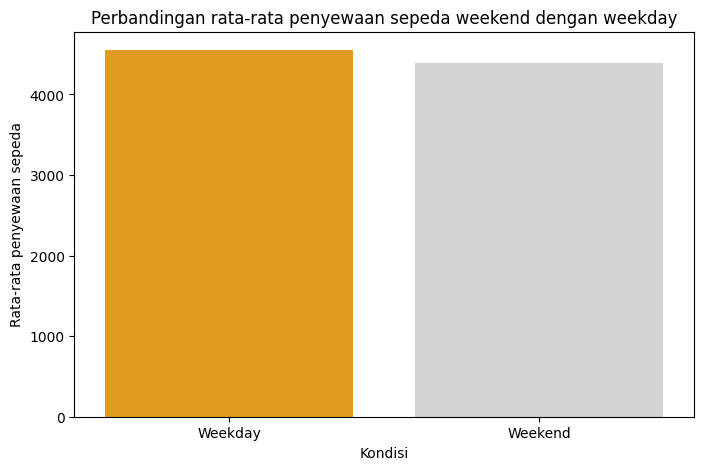

In [145]:
day_df['is_weekend'] = day_df['date'].dt.dayofweek >= 5  # 5 dan 6 adalah Sabtu dan Minggu

# Menghitung rata-rata penyewaan untuk weekday dan weekend
avg_rentals = day_df.groupby('is_weekend')['count'].mean().reset_index()

# Mengubah nilai boolean menjadi label yang lebih deskriptif
avg_rentals['is_weekend'] = avg_rentals['is_weekend'].replace({True: 'Weekend', False: 'Weekday'})

# Menampilkan rata-rata
print(avg_rentals)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rentals, x='is_weekend', y='count', palette=['orange', 'lightgray'])
plt.title('Perbandingan rata-rata penyewaan sepeda weekend dengan weekday')
plt.xlabel('Jenis hari')
plt.ylabel('Rata-rata penyewaan sepeda')
plt.show()


## Analisis RFM

In [146]:
rfm_df = day_df.groupby(by="weekday", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)


     weekday  frequency  monetary  recency
0     Sunday        105    444027        1
1     Monday        105    455503        0
2    Tuesday        104    469109        6
3  Wednesday        104    473048        5
4   Thursday        104    485395        4
5     Friday        104    487790        3
6   Saturday        105    477807        2

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\510174841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = day_df.groupby(by="weekday", as_index=False).agg({


In [147]:
rfm_df2 = day_df.groupby(by="season", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df2.columns = ["season", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df2["max_order_timestamp"] = rfm_df2["max_order_timestamp"].dt.date
recent_date = day_df["date"].dt.date.max()
rfm_df2["recency"] = rfm_df2["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df2.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df2)

     season  frequency  monetary  recency
0  springer        181    471348        0
1    summer        184    918589      194
2      fall        188   1061129      100
3    winter        178    841613       11


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_88976\1443361661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df2 = day_df.groupby(by="season", as_index=False).agg({


## Conclusion

- Pertanyaan 1 : Pada musim apa rata-rata penyewaan tertinggi terjadi?
- Pertanyaan 2 : Pada cuaca apa rata-rata penyewaan tertinggi terjadi?
- Pertanyaan 3 : Apakah weekend mempengaruhi rata-rata penyewaan sepeda?
- Konklusi pertanyaan 1 : Musim dengan rata-rata penyewaan tertinggi terjadi pada musim "Fall" sebesar 5644.303191
- Konklusi pertanyaan 2 : Cuaca dengan rata-rata penyewaan tertinggi terjadi pada cuaca "Clear" sebesar  4876.786177
- Konklusi pertanyaan 3 : Rata-rata penyewaan sepeda pada weekday lebih tinggi dibandingkan dengan rata-rata penyewaan pada weekend, yaitu masing-masing sebesar 4550.57 dan 4389.69.